<a href="https://colab.research.google.com/github/HazemmoAlsady/-End-to-End-Predictive-Analytics-Project/blob/main/Airbnb_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Step 1: Problem Statement

المشكلة:
التنبؤ بسعر الليلة (price) لإعلانات Airbnb في نيويورك بناءً على خصائص السكن مثل:

الموقع

نوع الغرفة

عدد المراجعات

الحد الأدنى لعدد الليالي

الهدف (Target):
price

# **Setup & Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Dataset Overview**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Data Preprocessing**

In [5]:
df.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)


In [6]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [7]:
df['reviews_per_month'].fillna(0, inplace=True)


/tmp/ipython-input-2638918283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in ['neighbourhood_group', 'neighbourhood', 'room_type']:
    df[col] = encoder.fit_transform(df[col])


# **Exploratory Data Analysis (EDA)**

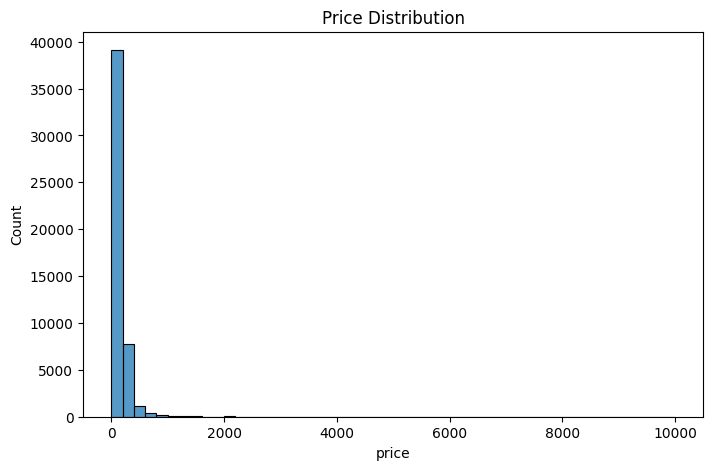

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50)
plt.title("Price Distribution")
plt.show()


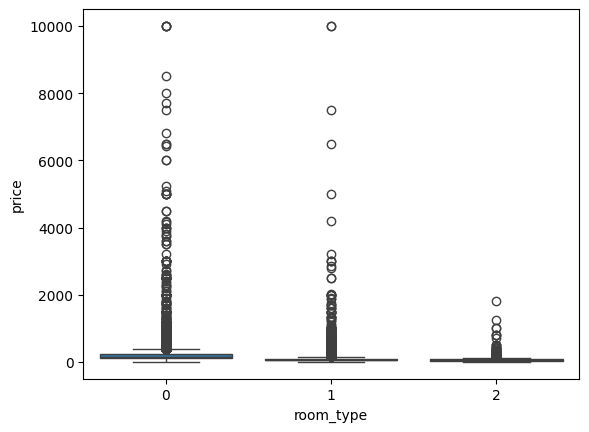

In [11]:
sns.boxplot(x='room_type', y='price', data=df)
plt.show()


# **Feature Selection**

In [12]:
X = df.drop('price', axis=1)
y = df['price']


# **Train-Test Split**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# **Build Predictive Models**

In [16]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)


In [17]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)


In [18]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


# **Model Evaluation**

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_test, y_pred):
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2:", r2_score(y_test, y_pred))
    print("-"*30)


In [20]:
print("Linear Regression")
evaluate(y_test, lr_pred)

print("Decision Tree")
evaluate(y_test, dt_pred)

print("Random Forest")
evaluate(y_test, rf_pred)


Linear Regression
MAE: 72.94132895576048
RMSE: 188.3547233703981
R2: 0.12156804146842215
------------------------------
Decision Tree
MAE: 86.36962301452041
RMSE: 309.6131478404943
R2: -1.3735254152631815
------------------------------
Random Forest
MAE: 64.5879738450701
RMSE: 184.59309522953328
R2: 0.15630397928874018
------------------------------


# **Final Visualization**

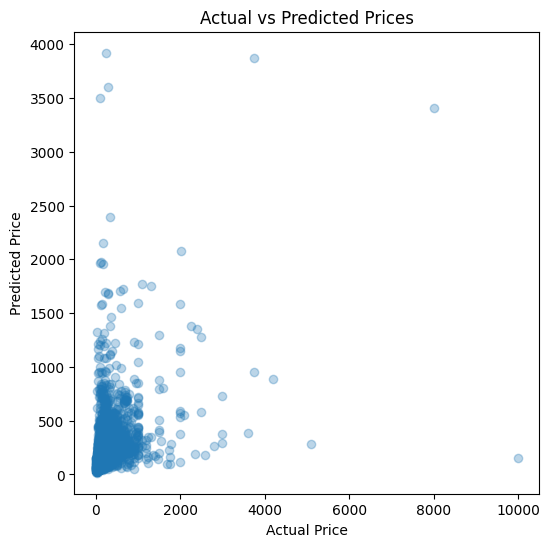

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


# **Prediction**

In [22]:
sample = X.iloc[0:1]
rf.predict(sample)


array([285.54])

In [24]:
sample = X_test.iloc[0:1]
actual_price = y_test.iloc[0]

predicted_price = rf.predict(sample)

print("Actual Price:", actual_price)
print("Predicted Price:", int(predicted_price[0]))


Actual Price: 89
Predicted Price: 141
